# 0.0 IMPORTS

In [1]:
import inflection

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns


from IPython.core.display  import HTML
from IPython.display       import Image

## 0.1 HELPER FUNCTIONS

In [39]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
     
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 LOADING DATA

In [2]:
df_raw = pd.read_csv("data/Train.csv", low_memory = False)

# 1.0 DESCRICAO DOS DADOS

In [3]:
df1 = df_raw.copy()

**ID**: ID Number of Customers.

**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product**: Cost of the Product in US Dollars.

**Prior purchases**: The Number of Prior Purchase.

**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**Gender**: Male and Female.

**Discount offered**: Discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [4]:
df1.head(3).append(df1.tail(3))

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## 1.1 Rename Columns

In [5]:
cols_old = df1.columns

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map(snakecase, cols_old)) 

#rename
df1.columns = cols_new

In [6]:
df1.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n'],
      dtype='object')

In [7]:
df1 = df1.set_index('id')

## 1.2 Data Dimensions

In [8]:
print("Number of Rows: {}".format(df1.shape[0]))
print("Number of Columns: {}".format(df1.shape[1]))

Number of Rows: 10999
Number of Columns: 11


## 1.3 Data Types

In [9]:
df1.dtypes

warehouse_block        object
mode_of_shipment       object
customer_care_calls     int64
customer_rating         int64
cost_of_the_product     int64
prior_purchases         int64
product_importance     object
gender                 object
discount_offered        int64
weight_in_gms           int64
reached.on.time_y.n     int64
dtype: object

## 1.4 Check NA

In [10]:
df1.isna().sum()

warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

## 1.5 Descriptive Statistical

In [11]:
num_columns = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'customer_rating']
cat_columns = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender', 'reached.on.time_y.n']
num_attributes = df1[num_columns]
cat_attributes = df1[cat_columns]

print(num_attributes.columns)

print(cat_attributes.columns)


Index(['customer_care_calls', 'cost_of_the_product', 'prior_purchases',
       'discount_offered', 'weight_in_gms', 'customer_rating'],
      dtype='object')
Index(['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender',
       'reached.on.time_y.n'],
      dtype='object')


In [12]:
df1[cat_columns] = df1[cat_columns].astype('category')
print(df1.dtypes)

warehouse_block        category
mode_of_shipment       category
customer_care_calls       int64
customer_rating           int64
cost_of_the_product       int64
prior_purchases           int64
product_importance     category
gender                 category
discount_offered          int64
weight_in_gms             int64
reached.on.time_y.n    category
dtype: object


### 1.5.1 Numerical Attributes

In [13]:
# Central Tendency -media, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenete
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m. columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,customer_care_calls,2.0,7.0,5.0,4.054459,4.0,1.141438,0.391926,-0.308995
1,cost_of_the_product,96.0,310.0,214.0,210.196836,214.0,48.061087,-0.157117,-0.972160
2,prior_purchases,2.0,10.0,8.0,3.567597,3.0,1.522791,1.681897,4.006342
3,discount_offered,1.0,65.0,64.0,13.373216,7.0,16.204790,1.798929,2.000586
4,weight_in_gms,1001.0,7846.0,6845.0,3634.016729,4149.0,1635.302908,-0.249747,-1.447671
5,customer_rating,1.0,5.0,4.0,2.990545,3.0,1.413539,0.004360,-1.295654


### 1.5.2 Categorical Attribute

In [14]:
cat_attributes.apply( lambda x: x.unique() )

warehouse_block             [D, F, A, B, C]
mode_of_shipment       [Flight, Ship, Road]
product_importance      [low, medium, high]
gender                               [F, M]
reached.on.time_y.n                  [1, 0]
dtype: object

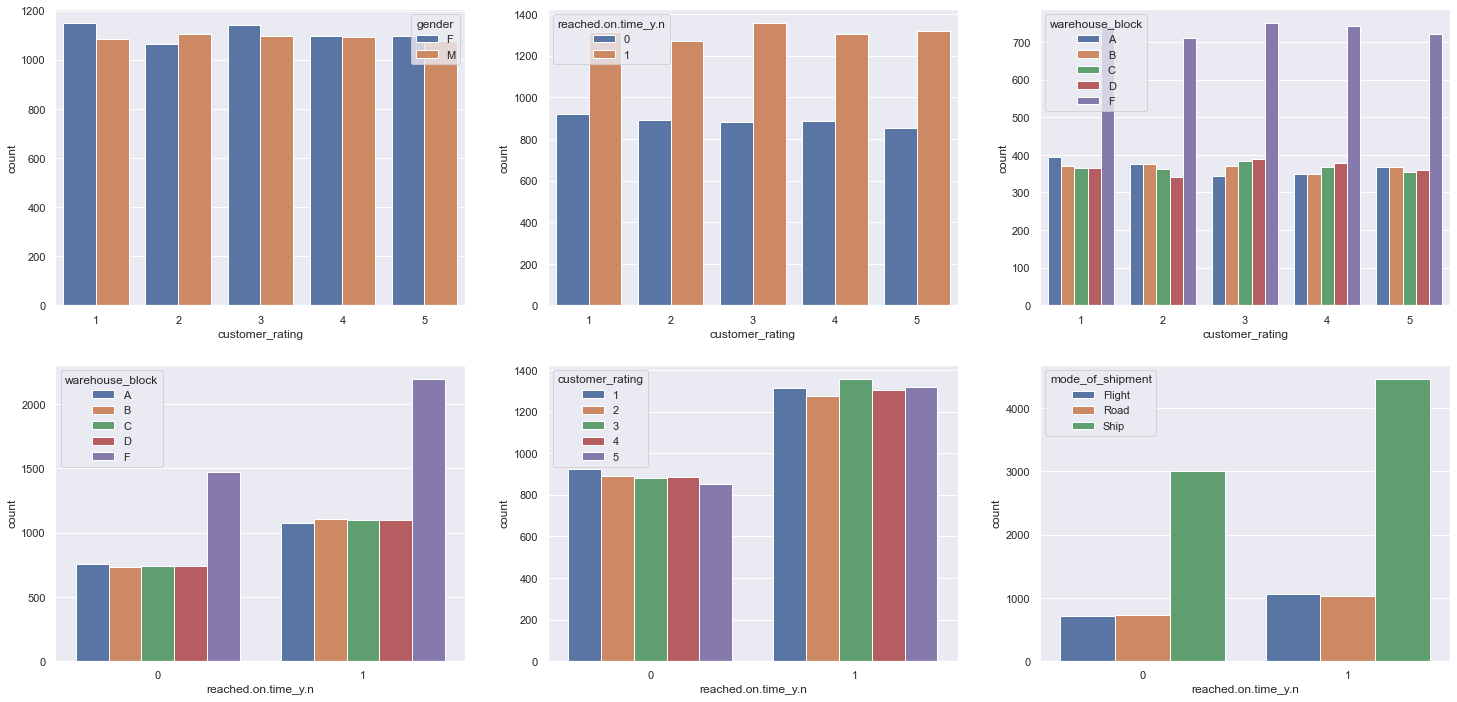

In [40]:
plt.subplot(2, 3, 1)
sns.countplot(x = 'customer_rating', data = df1, hue = 'gender')

plt.subplot(2, 3, 2)
sns.countplot(x = 'customer_rating', data = df1, hue = 'reached.on.time_y.n')

plt.subplot(2, 3, 3)
sns.countplot(x = 'customer_rating', data = df1, hue = 'warehouse_block')

plt.subplot(2, 3, 4)
sns.countplot(x = 'reached.on.time_y.n', data = df1, hue = 'warehouse_block')

plt.subplot(2, 3, 5)
sns.countplot(x = 'reached.on.time_y.n', data = df1, hue = 'customer_rating')

plt.subplot(2, 3, 6)
sns.countplot(x = 'reached.on.time_y.n', data = df1, hue = 'mode_of_shipment')

plt.show()

In [16]:
df1['customer_rating'].value_counts(normalize=True, sort=False)


1    0.203200
2    0.196836
3    0.203564
4    0.199018
5    0.197382
Name: customer_rating, dtype: float64

In [17]:
df1['reached.on.time_y.n'].value_counts(normalize=True)

1    0.596691
0    0.403309
Name: reached.on.time_y.n, dtype: float64

# 2.0  FEATURE ENGINEERING

In [18]:
df2=df1.copy()

## 2.1 Mapa mental de Hipóteses

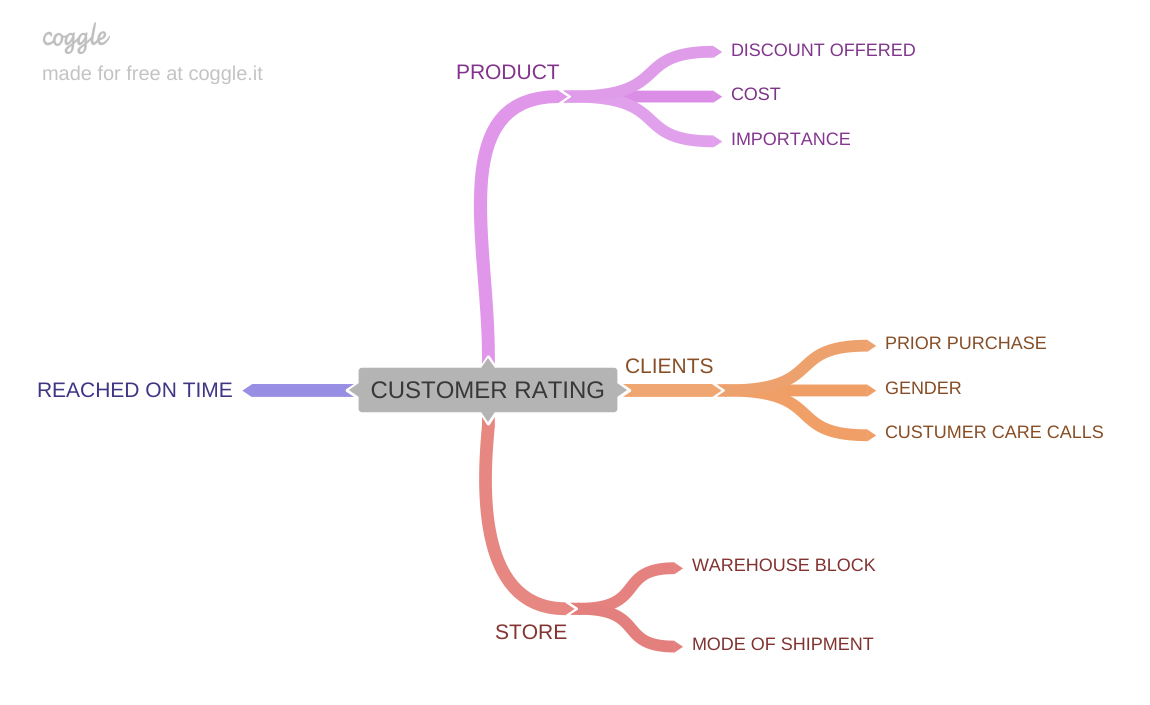

In [19]:
Image("img/MindMapHypothesis.png")

## 2.2 Criação de hipóteses

### 2.2.1 Store

**1.** Flight shipments have better customer ratings

**2.** There are warehouse blocks with better results than the others

### 2.2.2 Clients

**1.** Clients with more prior purchases give better rattings

**2.** Man give better ratings than woman

**3.** Clients with more cutomer calls give worse ratings

### 2.2.3 Product

**1.** When a discount is offered, clients tend to give better ratings

**2.** More expensive products result in worse ratings

**3.** More important products results in better ratings

### 2.2.4 Delivery time

**1.** Products that reach on time have better ratings

# 3.0 ANALISE EXPLORATORIA DOS DADOS

In [20]:
df3 = df2.copy()

## 3.1 Analise Univarida

### 3.1.1 Response variable

In [21]:
sns.set_palette('Set2')

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


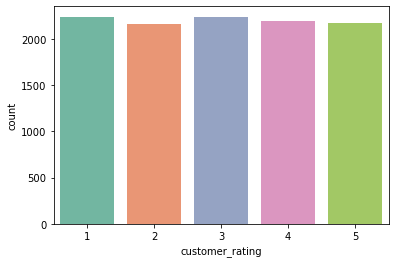

In [22]:
sns.countplot('customer_rating', data = df3 )
plt.show()

### 3.1.2 Numerical variable

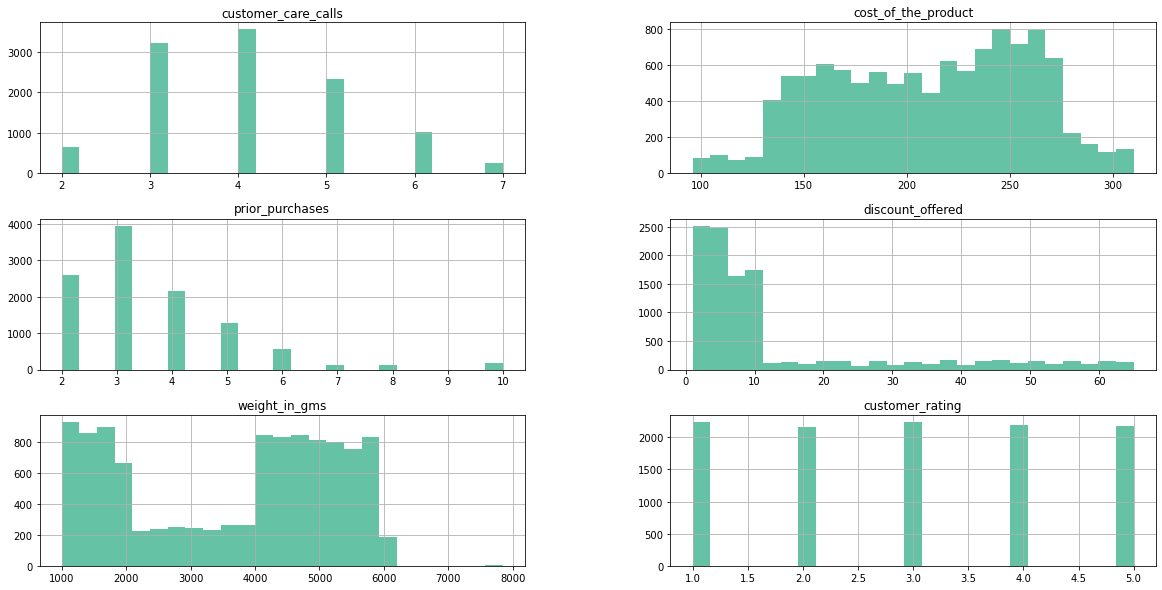

In [23]:
num_attributes.hist( bins=25 , figsize = (20,10));

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


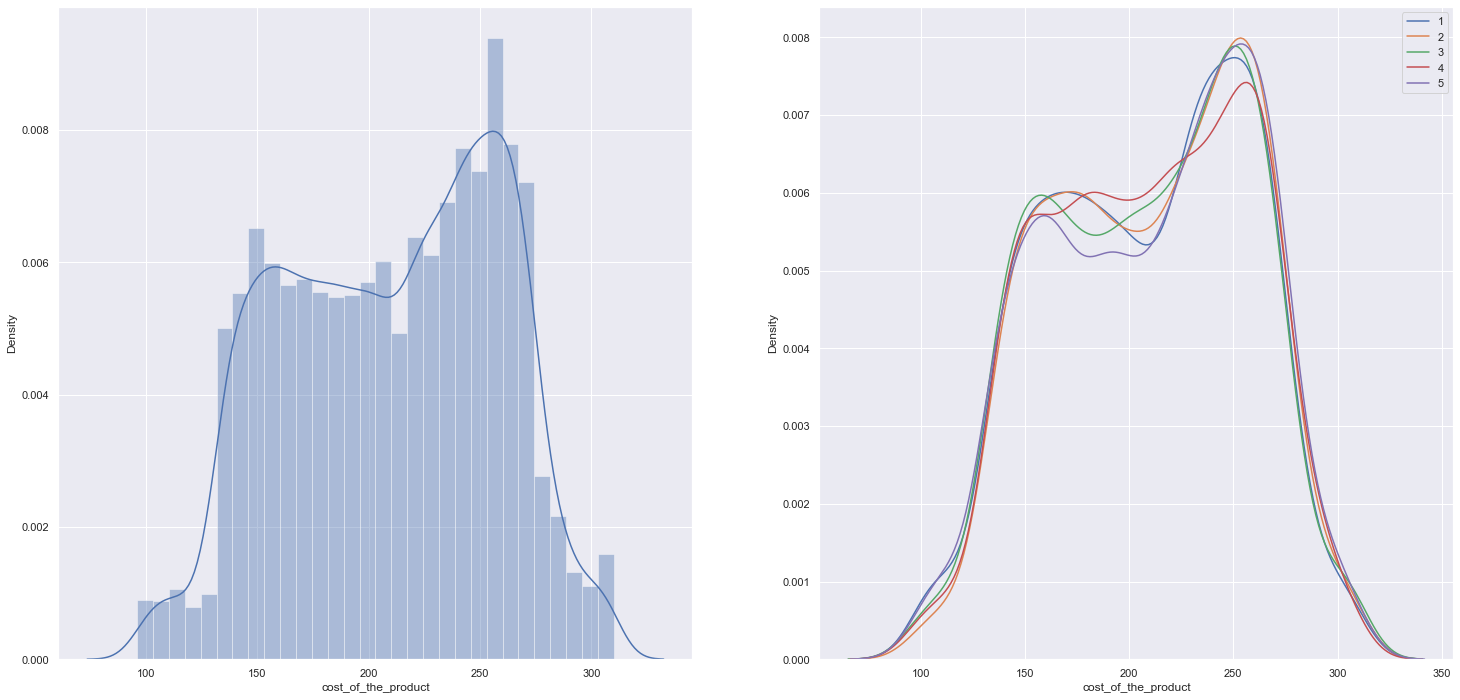

In [41]:
#Cost of the product: analyze the influence between the cost of the product and the rating of the customer
plt.subplot(1,2,1)
sns.distplot( df3["cost_of_the_product"] )

plt.subplot(1,2,2)
sns.kdeplot( df3[df3["customer_rating"] == 1]["cost_of_the_product"], label = "1")
sns.kdeplot( df3[df3["customer_rating"] == 2]["cost_of_the_product"], label = "2")
sns.kdeplot( df3[df3["customer_rating"] == 3]["cost_of_the_product"], label = "3")
sns.kdeplot( df3[df3["customer_rating"] == 4]["cost_of_the_product"], label = "4")
sns.kdeplot( df3[df3["customer_rating"] == 5]["cost_of_the_product"], label = "5")
plt.legend()

plt.show()

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


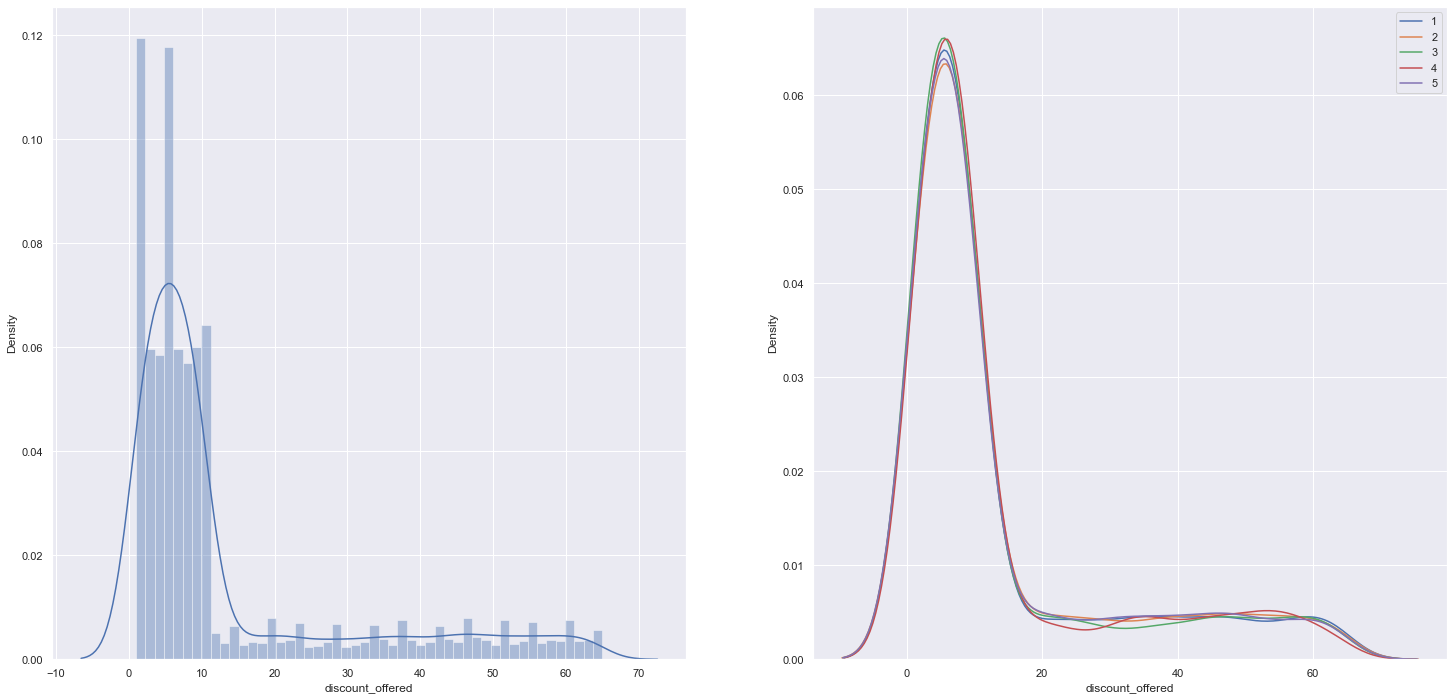

In [42]:
#discount offered: analyze the relationship of the discount offered and the customer rating
plt.subplot(1,2,1)
sns.distplot( df3["discount_offered"] )

plt.subplot(1,2,2)
sns.kdeplot( df3[df3["customer_rating"] == 1]["discount_offered"], label = "1")
sns.kdeplot( df3[df3["customer_rating"] == 2]["discount_offered"], label = "2")
sns.kdeplot( df3[df3["customer_rating"] == 3]["discount_offered"], label = "3")
sns.kdeplot( df3[df3["customer_rating"] == 4]["discount_offered"], label = "4")
sns.kdeplot( df3[df3["customer_rating"] == 5]["discount_offered"], label = "5")
plt.legend()

### 3.1.3 Categorical Variable

## 3.2 Analise Bivarida

### H1 - Flight shipments have better customer ratings

**False** There is just a few difference in the custome ratings between the kind of shipment, with a little disvantage for the flight ones when looking to the mean rates. When we look only for the Excelent Rates (4 or 5) we have a realy small adventege for flight shipments, but we can confirm relationship.

1    0.207653
2    0.203714
3    0.185706
4    0.204277
5    0.198649
Name: customer_rating, dtype: float64
4    0.196864
1    0.201689
5    0.196462
2    0.195122
3    0.209863
Name: customer_rating, dtype: float64
1    0.205114
2    0.197159
3    0.194886
4    0.202841
5    0.200000
Name: customer_rating, dtype: float64


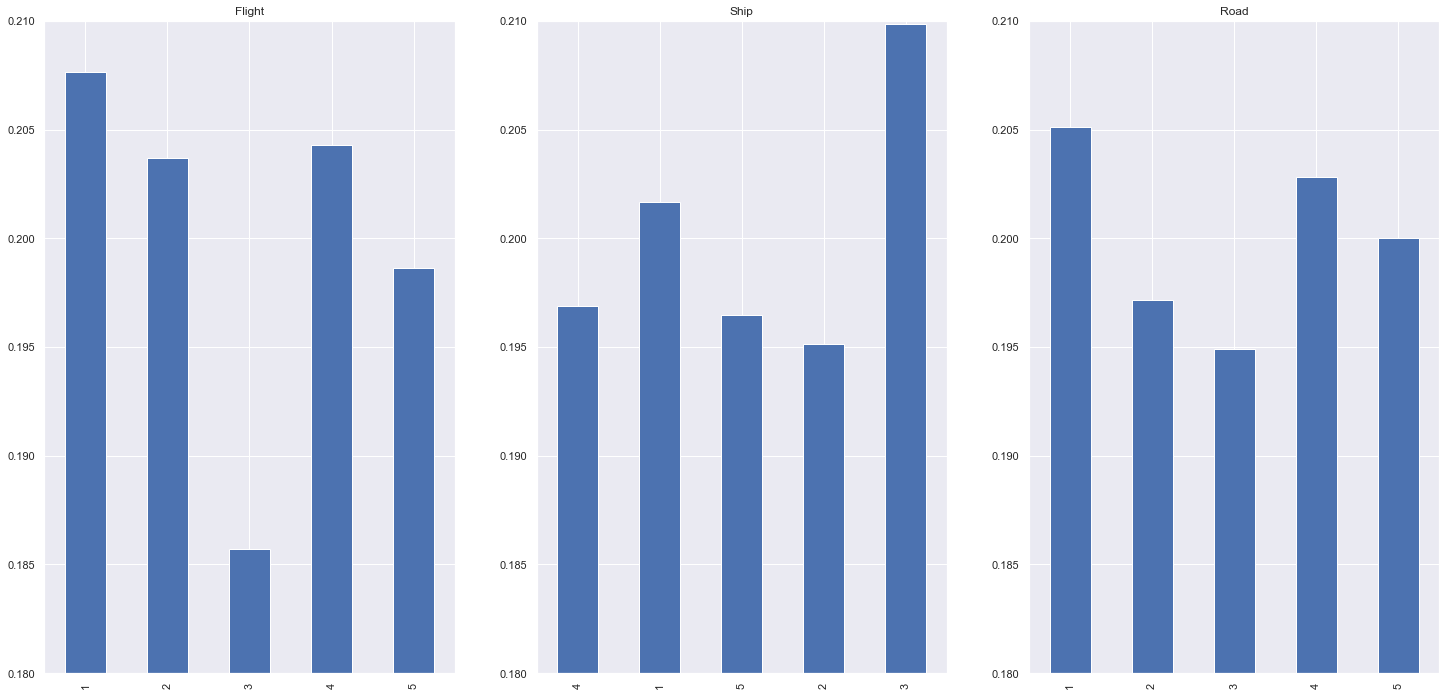

In [44]:
flight = df3[df3["mode_of_shipment"] == 'Flight']
ship = df3[df3["mode_of_shipment"] == 'Ship']
road = df3[df3["mode_of_shipment"] == 'Road']

print(flight['customer_rating'].value_counts(normalize = True, sort = False))

print(ship['customer_rating'].value_counts(normalize = True, sort = False))

print(road['customer_rating'].value_counts(normalize = True, sort = False))

plt.subplot(1,3,1)
flight['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.180, 0.210)
plt.title('Flight')

plt.subplot(1,3,2)
ship['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar', sort_columns = True)
plt.ylim(0.180, 0.210)
plt.title('Ship')

plt.subplot(1,3,3)
road['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.180, 0.210)
plt.title('Road')

plt.show()

In [60]:
# Calculate the fraction of rates greater than 4 for each shipment type
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'mode_of_shipment', aggfunc = 'mean'))

len_flight45 = len(flight[flight['customer_rating'] >= 4]) 
len_flight = len(flight)
fract_flight = len_flight45/len_flight

len_ship45 = len(ship[ship['customer_rating'] >= 4]) 
len_ship = len(ship)
fract_ship = len_ship45/len_ship

len_road45 = len(road[road['customer_rating'] >= 4]) 
len_road = len(road)
fract_road = len_road45/len_road

print("\n", 'The fraction of rates greater or equal to 4 for flight shipments are: ', fract_flight )
print("\n", 'The fraction of rates greater or equal to 4 for ship shipments are: ', fract_ship )
print("\n", 'The fraction of rates greater or equal to 4 for road shipments are: ', fract_road )

mode_of_shipment    Flight      Road      Ship
customer_rating   2.982555  2.995455  2.991289

 The fraction of rates greater or equal to 4 for flight shipments are:  0.40292628024760835

 The fraction of rates greater or equal to 4 for ship shipments are:  0.39332618600911284

 The fraction of rates greater or equal to 4 for road shipments are:  0.4028409090909091


### H2 - There are warehouse blocks with better results than the others
**False** The distribuitions of grades by the warehouse blocks are almost the same

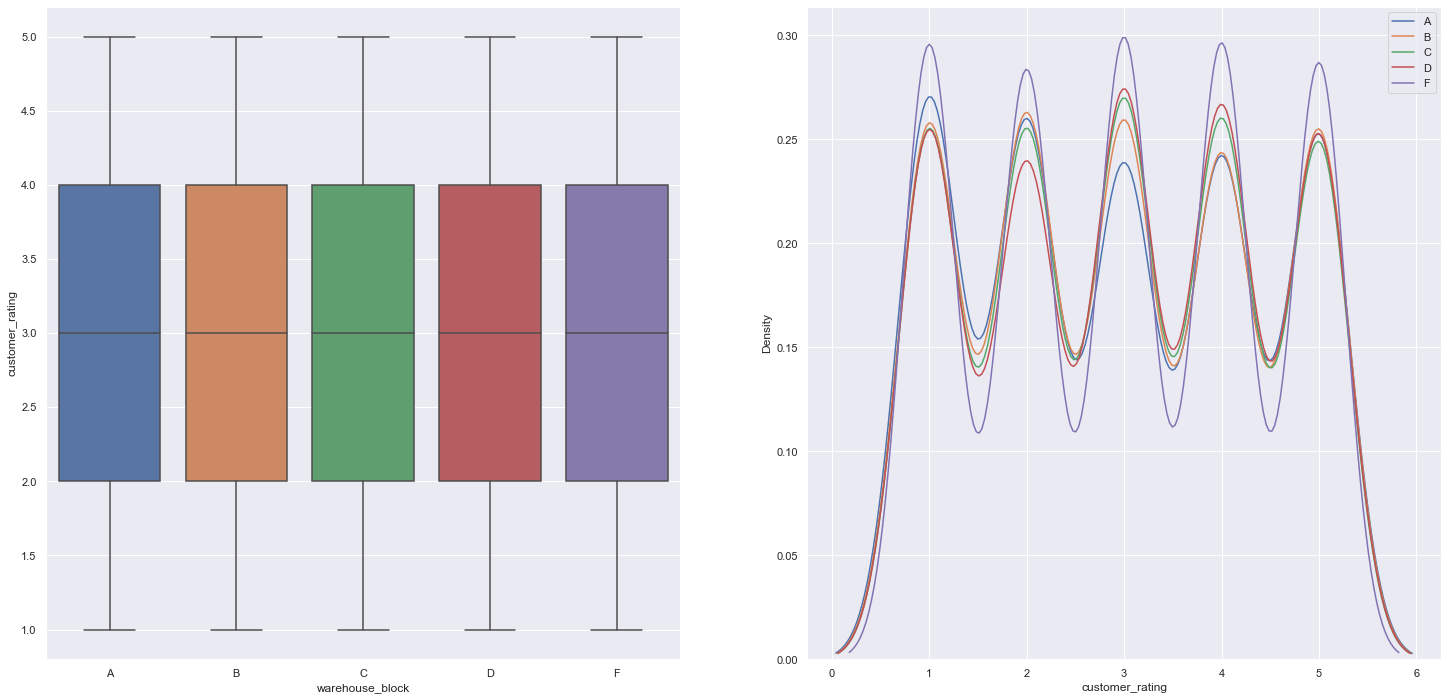

In [65]:
plt.subplot(1,2,1)
sns.boxplot(x = 'warehouse_block', y = 'customer_rating', data = df3)


### H3 - Clients with more prior purchases give better rattings
**True** Here we can see some relationship, clients more faithful tend to give better rates. But it isn't a very strong change.

In [70]:
df3['prior_purchases'].unique() 

array([ 3,  2,  4,  6,  5,  7, 10,  8], dtype=int64)

In [73]:
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'prior_purchases', aggfunc = 'mean'))

prior_purchases        2         3         4         5         6         7         8         10
customer_rating  2.955752  2.997977  3.029234  2.941725  3.016043  2.867647  3.039062  3.196629


<AxesSubplot:xlabel='prior_purchases', ylabel='customer_rating'>

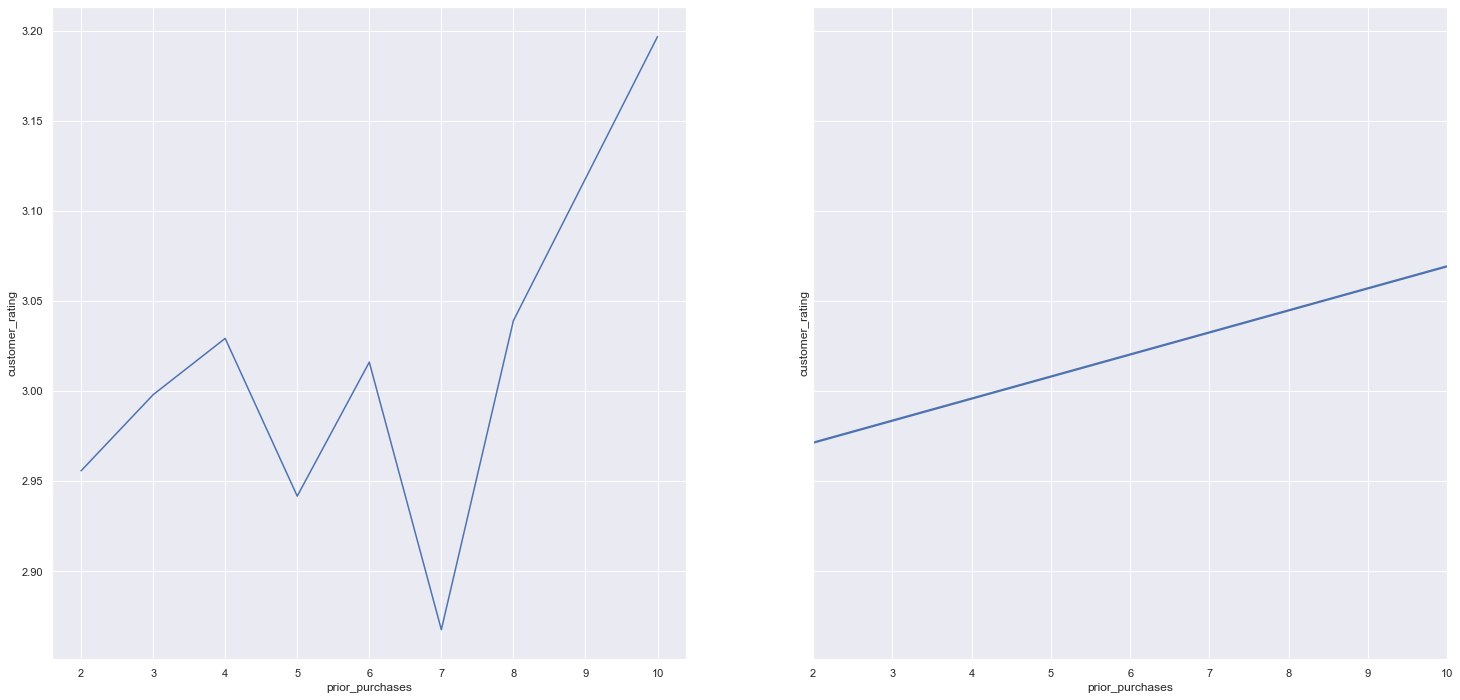

In [115]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='prior_purchases' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='prior_purchases' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H4 - Man give better ratings than woman
**True** The mean rates from man are a little greater than the woman are, and they also tend to give more Excelent Rates (4 and 5).

In [80]:
man = df3[df3["gender"] == 'M']
woman = df3[df3["gender"] == 'F']

In [104]:
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'gender', aggfunc = 'mean'))

len_man45 = len(man[man['customer_rating'] >= 4]) 
len_man = len(man)
fract_man = len_man45/len_man

len_woman45 = len(woman[woman['customer_rating'] >= 4]) 
len_woman = len(woman)
fract_woman = len_woman45/len_woman

print("\n", 'The fraction of rates greater or equal to 4 for man are: ', fract_man )
print("\n", 'The fraction of rates greater or equal to 4 for woman are: ', fract_woman )


gender                  F         M
customer_rating  2.986655  2.994499

 The fraction of rates greater or equal to 4 for man are:  0.3976897689768977

 The fraction of rates greater or equal to 4 for woman are:  0.3951307484220018


2    0.202237
3    0.200953
4    0.200403
1    0.199120
5    0.197286
Name: customer_rating, dtype: float64
1    0.207214
3    0.206132
4    0.197656
5    0.197475
2    0.191524
Name: customer_rating, dtype: float64


(0.19, 0.21)

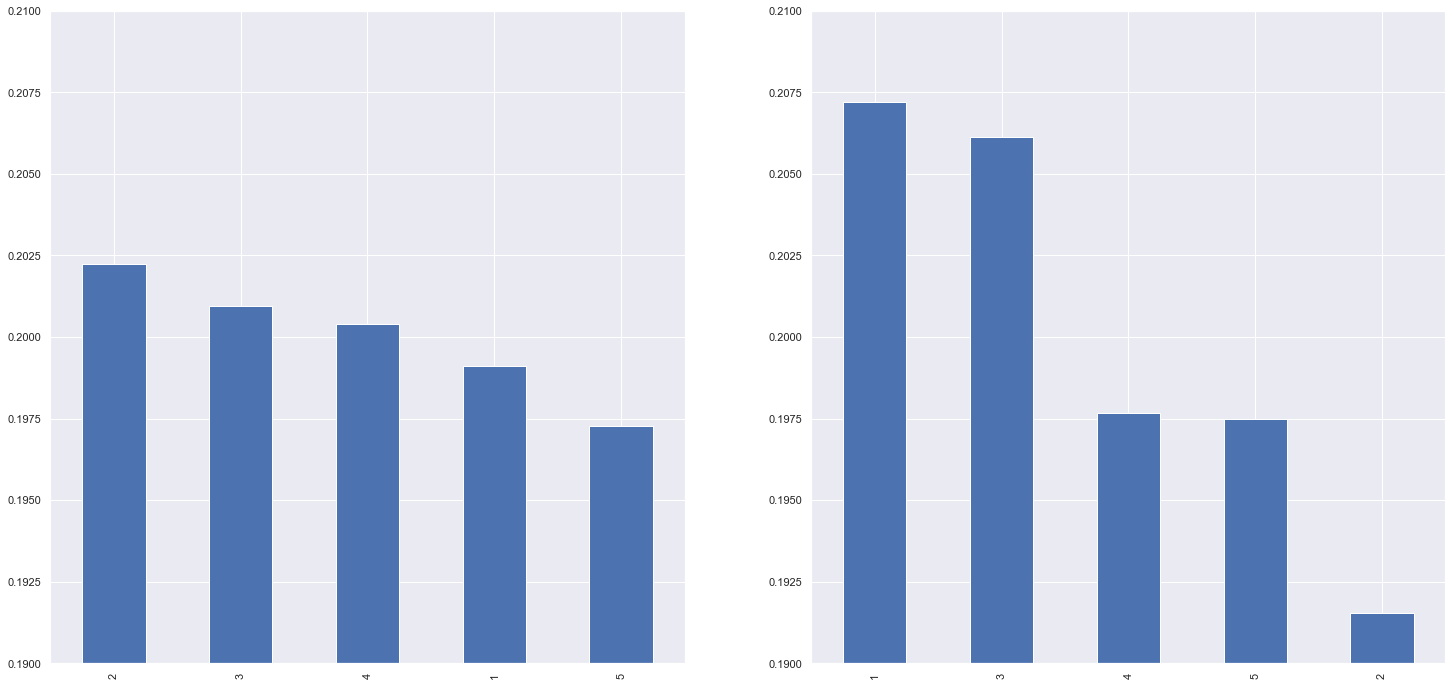

In [100]:
print(man['customer_rating'].value_counts(normalize = True))

print(woman['customer_rating'].value_counts(normalize = True))

plt.subplot(1,2,1)
man['customer_rating'].value_counts(normalize = True).plot(kind = 'bar')
plt.ylim(0.190, 0.210)

plt.subplot(1,2,2)
woman['customer_rating'].value_counts(normalize = True).plot(kind = 'bar')
plt.ylim(0.190, 0.210)


### H5 - Clients with more cutomer calls give worse ratings
**False** We can see a small tendency showing that clients with more care calls give better rates

In [105]:
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'customer_care_calls', aggfunc = 'mean'))

customer_care_calls         2         3         4         5         6         7
customer_rating      3.017241  2.959901  2.998032  2.972938  3.083909  2.995935


<AxesSubplot:xlabel='customer_care_calls', ylabel='customer_rating'>

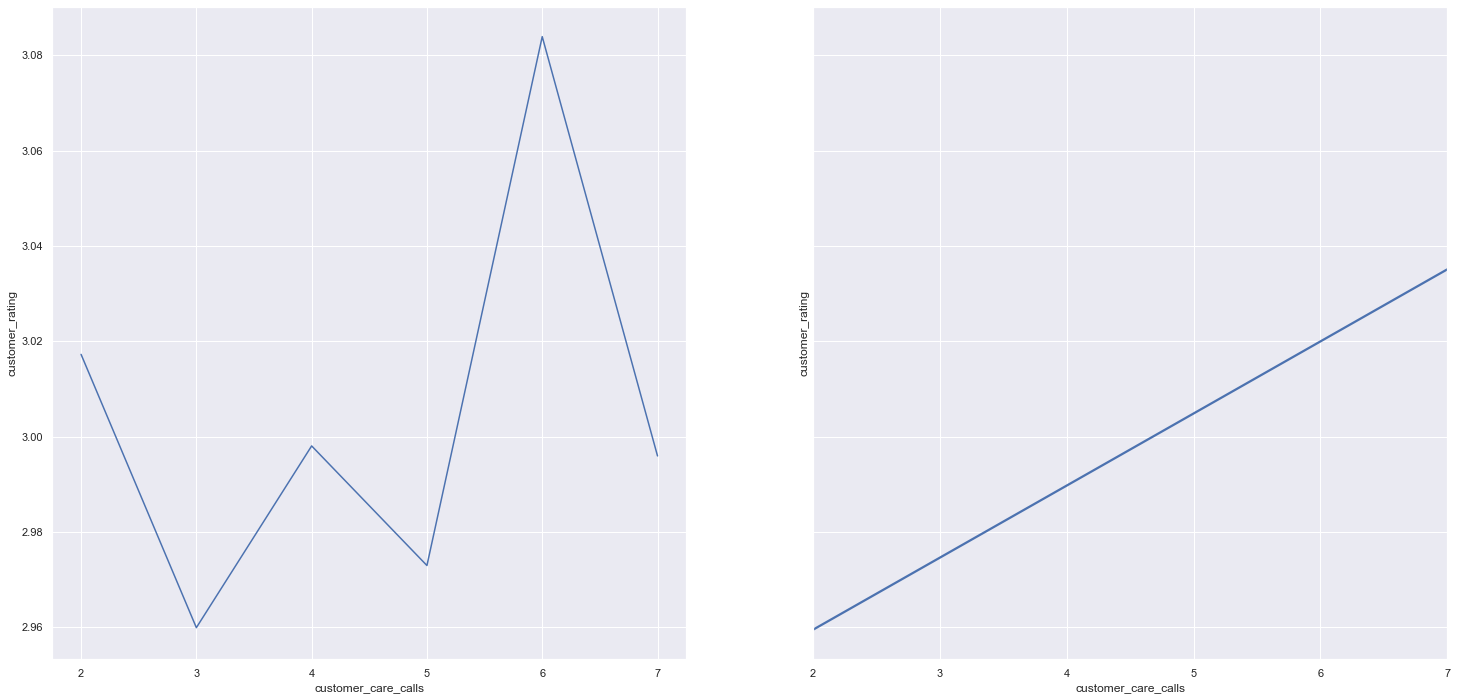

In [114]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='customer_care_calls' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='customer_care_calls' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H6 - The greater the discount offered are, the better the rates are
**False** We can't see any substancial relationship here, even with the slightly tendency to worsen the rates the bigger the discount offered, but this would also go against our hypothesis
 


In [116]:
#would better rates be given for more expensive products?

print(df3.groupby('customer_rating')['discount_offered'].mean())

customer_rating
1    13.458166
2    13.687760
3    12.979902
4    13.257195
5    13.494703
Name: discount_offered, dtype: float64


<AxesSubplot:xlabel='discount_offered', ylabel='customer_rating'>

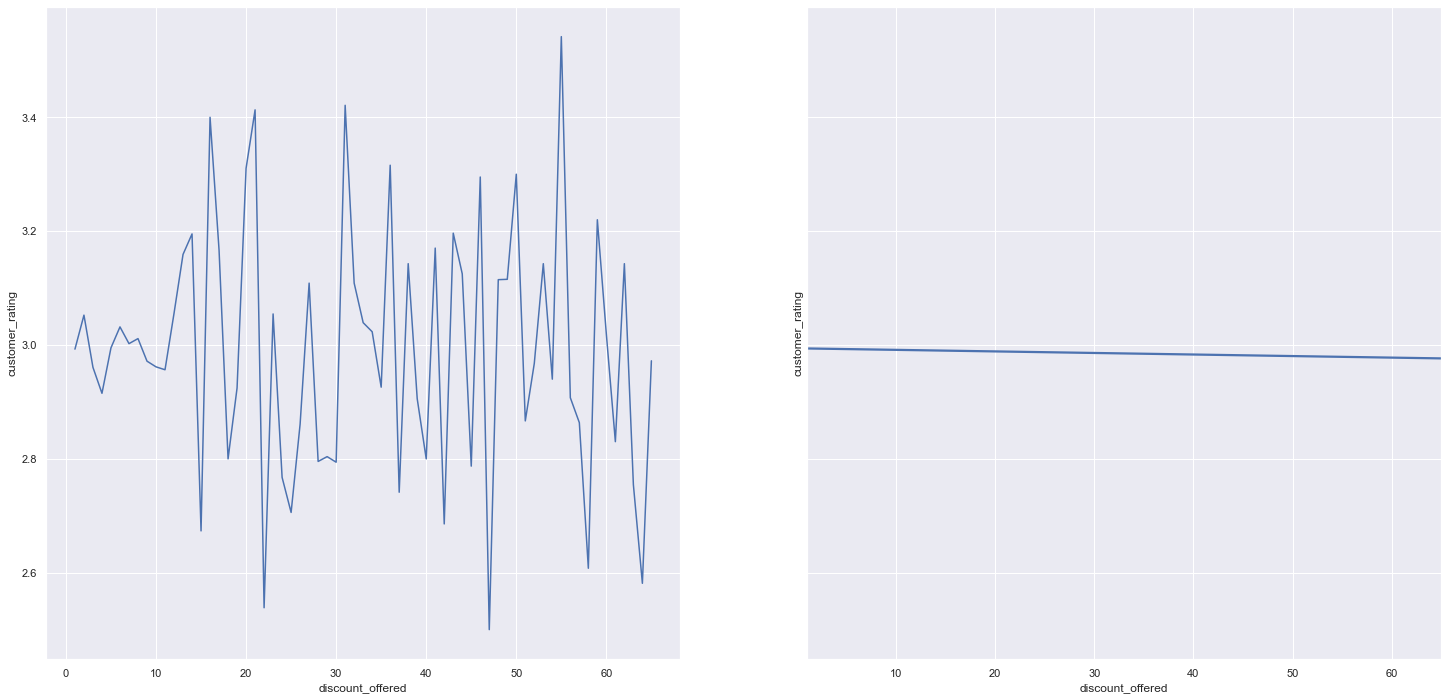

In [117]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='discount_offered' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='discount_offered' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H7 - More expensive products result in worse ratings?
**Vague** There are a discreet positive influence in the improvement of the rates by the more expensive the product are, but it is too little too confirm the validity of this affirmation, maybe with a data with a greater range of prices we could analyze it better


In [121]:
aux = df3.copy()
aux = aux[cat_columns].astype('category')

customer_rating
1    208.979866
2    211.387067
3    209.384547
4    210.132937
5    211.164901
Name: cost_of_the_product, dtype: float64


<AxesSubplot:xlabel='customer_rating', ylabel='cost_of_the_product'>

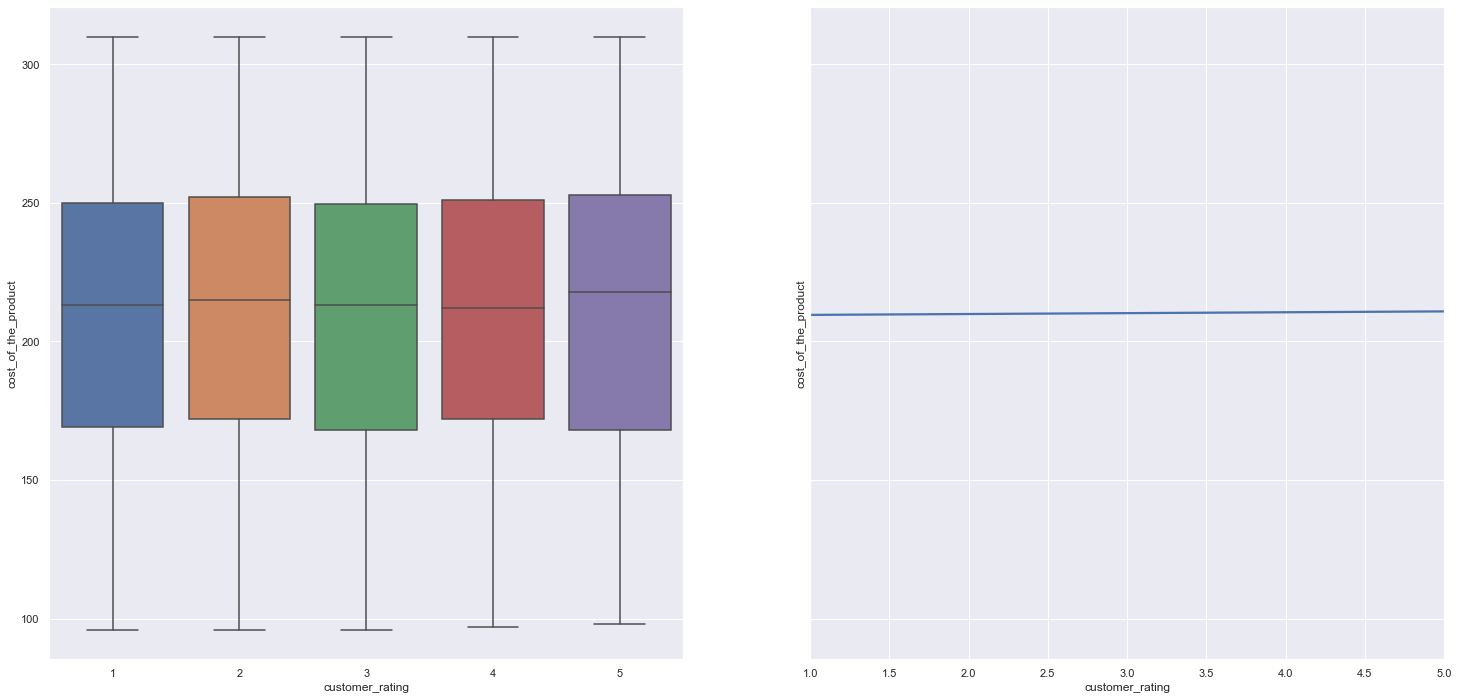

In [123]:
#better rated products are more expensive?

print(df3.groupby('customer_rating')['cost_of_the_product'].mean())

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.boxplot(x = 'customer_rating', y = 'cost_of_the_product', data = df3, ax = ax0)
sns.regplot(x='customer_rating' , y= 'cost_of_the_product', data=df3, ci = None, scatter = False, ax = ax1)

<AxesSubplot:xlabel='cost_of_the_product', ylabel='customer_rating'>

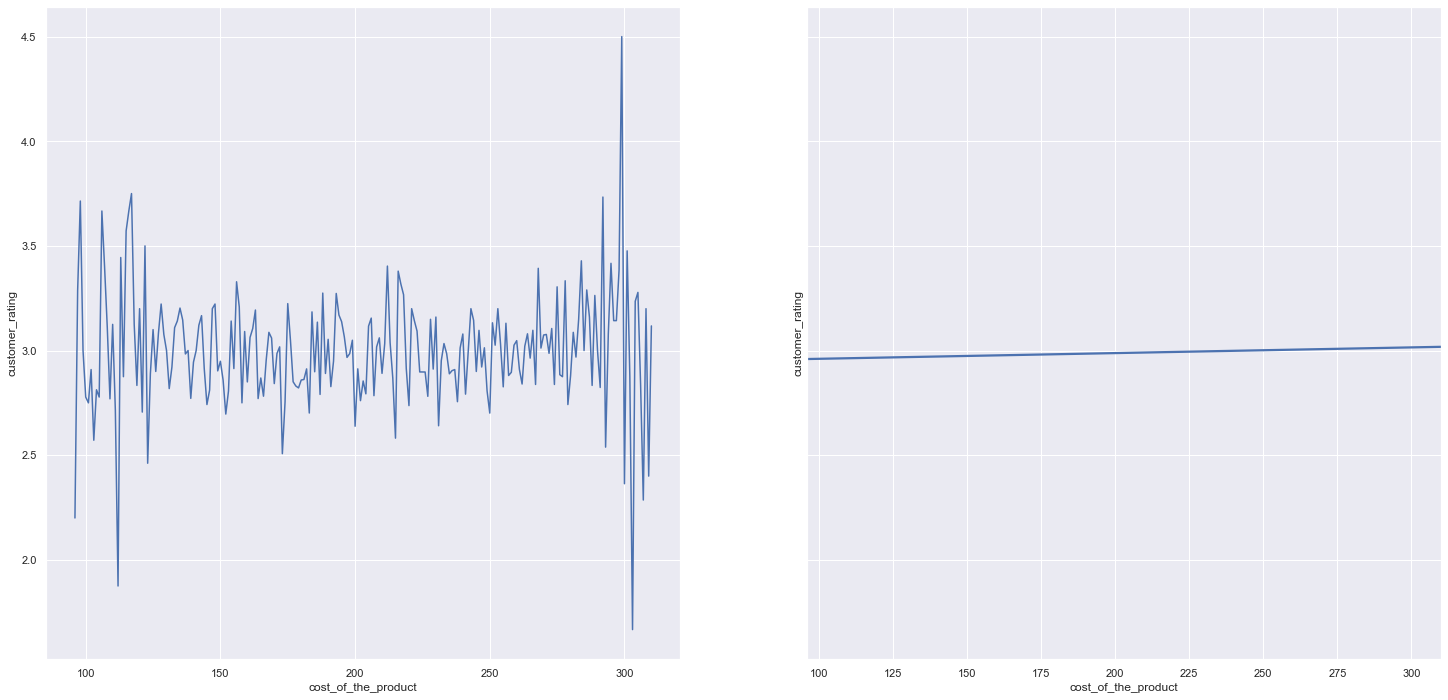

In [124]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='cost_of_the_product' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='cost_of_the_product' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H8 - More important products results in better ratings

### H9 - Products that reach on time have better ratings

## 4.3 Analise Multivarida

### 4.3.1 Numerical Attributes

### 4.3.2 Categorical Attributes

# 5.0 DATA PREPARATION

## 5.1 Normalização

## 5.2 Rescaling

## 5.3 Transformação

### 5.3.1 Encoding

### 5.3.2 Response Variable Transformation

### 5.3.3 Nature Transformation

# 6.0 SELECAO DE VARIAVEIS

## 6.1 Split dataframe into training and test dataset

## 6.2 Boruta as Feature Selector

### 6.2.1 Best Features from Boruta

## 6.3 Manual Feature Selection

# 7.0 MACHINE LEARNING MODELING

## 7.1 Avarege Model

## 7.2 Linear Regression Model

### 7.2.1 Linear Regression Model - Cross Validation

## 7.3 Linear Regression Regularized Model - Lasso

### 7.3.1 Lasso - Cross Validation

## 7.4 Random Forest Regressor

###  7.4.1 Random Forest Regressor - Cross Validation

## 7.5 XGBoost Regressor

### 7.5.1 XGBoost Regressor - Cross Validation

## 7.6 Compare Model's Performace

### 7.6.1 Single Performance

### 7.6.2 Real Performance - Cross Validation

# 8.0 HYPERPARAMETER FINE TUNING 

## 8.1 Random Search

## 8.2 Final Model

# 9.0 TRADUÇÃO E INTERPRETAÇÃO DO ERRO 

## 9.1 Business Performace

## 9.2 Total Performace

## 9.3 Machine Learning Performace

# 10.0 DEPLOY MODEL TO PRODUCTION

## 10.1 Rossmann Class

## 10.2 API Handler

## 10.3 API Tester